In [2]:
from pynq import Overlay, allocate

overlay = Overlay("./filter2d.bit")

sobel = overlay.filter2d_accel_0

In [29]:
import os
import numpy as np
import time
from __future__ import division
import matplotlib.pyplot as plt
data=[]
src=[]
data = np.loadtxt('./src.txt')

for i in data:
    src.append(int(i))
for i in range(10):
    print(src[i])
len=len(src)
print(len)


205
204
205
204
210
211
204
206
206
205


TypeError: 'int' object is not callable

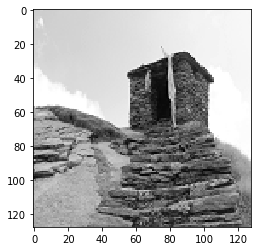

In [35]:
img = np.array (src)
d = img.reshape((128,128))
import cv2
plt.imshow(d,cmap='gray')


In [37]:
from pynq import allocate
input_buffer = allocate(shape=(16384,), dtype='i4')
output_buffer = allocate(shape=(15876,), dtype='i4')
kernel_buffer = allocate(shape=(9,), dtype='i4')

In [40]:
kernel=[]
kernel = [-1,-2,-1,0,0,0,1,2,1];
np.copyto(input_buffer, img)
np.copyto(kernel_buffer, np.int32(kernel))

In [41]:
input_buffer[10000:10009]

PynqBuffer([188, 184, 207, 205, 202, 198, 201, 105, 114])

In [43]:
kernel_buffer[0:9]

PynqBuffer([-1, -2, -1,  0,  0,  0,  1,  2,  1])

In [46]:
rows = d.shape[0]
cols = d.shape[1]

In [47]:
sobel.s_axi_control.write(0x10,input_buffer.physical_address)
sobel.s_axi_control.write(0x28,output_buffer.physical_address)
sobel.s_axi_control.write(0x1c,kernel_buffer.physical_address)
sobel.s_axi_CTRL.write(0x10, rows)
sobel.s_axi_CTRL.write(0x18, cols)

In [49]:
import time

sobel.s_axi_CTRL.write(0x00, 0x01)
start_time = time.time()
while True:
    reg = sobel.s_axi_CTRL.read(0x00)
    if reg != 1:
        break
end_time = time.time()

print("耗时：{}s".format(end_time - start_time))

耗时：0.0033063888549804688s


In [50]:
output_buffer[10000:10009]

PynqBuffer([  0,  78, 161, 178, 166, 176, 227, 217, 130])

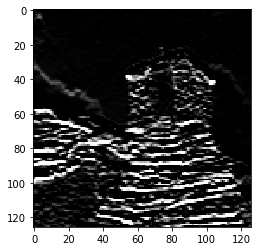

In [51]:
dst = np.array (output_buffer)
img_out = dst.reshape((126,126))
plt.imshow(img_out,cmap='gray')